In [1]:
import numpy as np
import pandas as pd

In [7]:
class AdalineGD:

    def __init__(self,lr=0.01,random_state=1,n_iter=50):
        self.lr = lr
        self.random_state = random_state
        self.n_iter = n_iter
    
    def net_input(self,X):
        return np.dot(X,self.w[1:])+self.w[0]
    
    def activation(self,X):
        return X
    
    def fit(self,X,y):
        rgen = np.random.RandomState(self.random_state)
        self.w = rgen.normal(loc=0.0, size=X.shape[1]+1,scale=0.01)
        self.cost = []
        
        for _ in range(self.n_iter):
            inp = self.net_input(X)
            output = self.activation(inp)
            errors = y-output
            self.w[1:] += self.lr*X.T.dot(errors)
            self.w[0] += self.lr*errors.sum()
            c = (errors**2).sum()/2
            self.cost.append(c)
        return self
    
    def predict(self,X):
        inp = self.net_input(X)
        output = self.activation(inp)
        return np.where(output>0.0,1,-1)

In [3]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None)

In [4]:
X = df.iloc[:100,[0,2]].values
y = df.iloc[:100,4].values
y = np.where(y=='Iris-setosa',-1,1)

In [5]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'LR-0.0001')

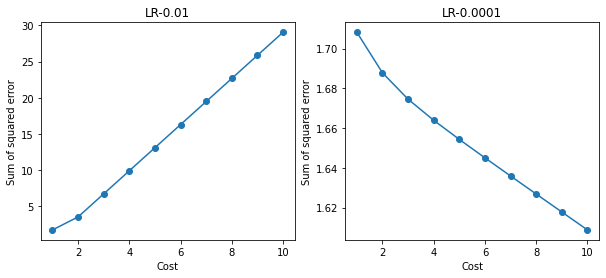

In [9]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,4))
ada1 = AdalineGD(n_iter=10,lr=0.01).fit(X,y)
ax[0].plot(range(1,len(ada1.cost)+1),np.log10(ada1.cost),marker='o')
ax[0].set_xlabel('Cost')
ax[0].set_ylabel('Sum of squared error')
ax[0].set_title('LR-0.01')
ada2 = AdalineGD(n_iter=10,lr=0.0001).fit(X,y)
ax[1].plot(range(1,len(ada2.cost)+1),np.log10(ada2.cost),marker='o')
ax[1].set_xlabel('Cost')
ax[1].set_ylabel('Sum of squared error')
ax[1].set_title('LR-0.0001')